In [7]:
%matplotlib widget
import geopandas as gpd
from torch_points3d.datasets.ssl.las_dataset import LasSSL
import matplotlib.pyplot as plt
from matplotlib.patches import RegularPolygon, Circle
import torch
import numpy as np

In [8]:
dataset = LasSSL('data/treeSSL', ["2017/*.laz", "2020-21/*.laz"], )

/var/home/victor/.micromamba/envs/tree_ssl_cpu/lib/python3.8/site-packages/torch_geometric/data/dataset.py:209: UserWarning: The `pre_transform` argument differs from the one used in the pre-processed version of this dataset. If you want to make use of another pre-processing technique, make sure to delete 'data/treeSSL/processed' first
  warnings.warn(


In [9]:
label_file = gpd.read_file('data/treeSSL/processed/label_files/2415_2931.gpkg')
label_file['index'] = label_file.index.values

In [10]:
label_file.explore()

Text(0.5, 0, 'x')

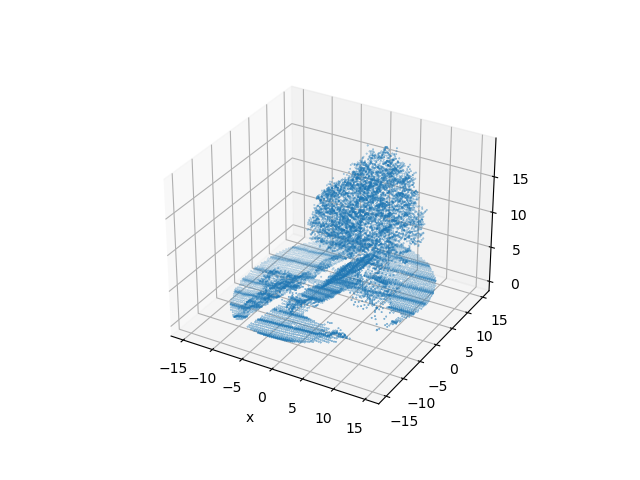

In [11]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*dataset[2415 + 324].pos.T, s=0.1)
plt.xlabel('x')

Text(0.5, 0, 'x')

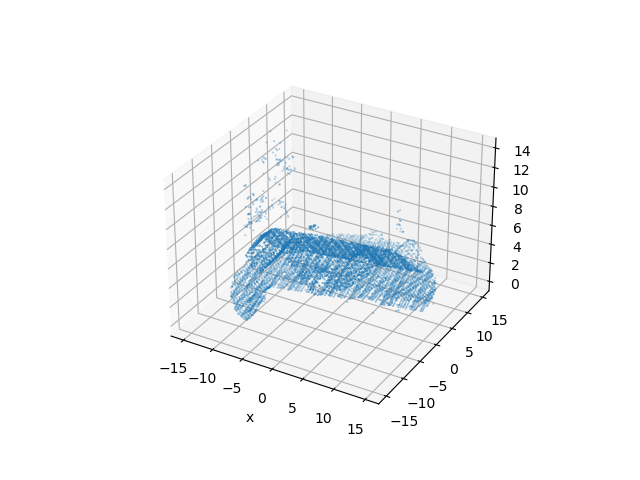

In [12]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*dataset[255].pos.T, s=0.1)
plt.xlabel('x')

Text(0.5, 0, 'x')

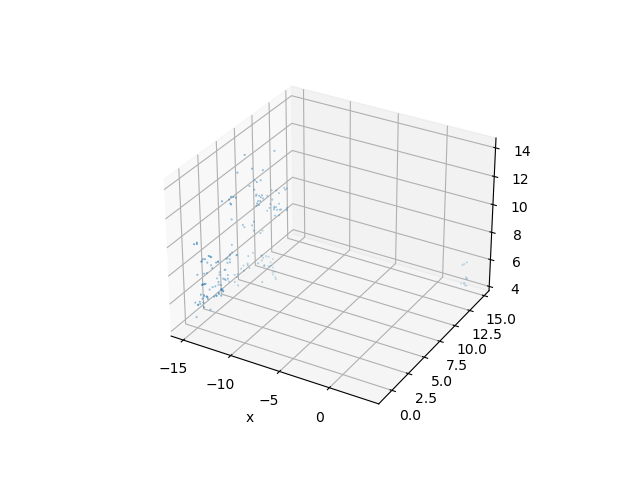

In [13]:
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.scatter(*dataset[255].pos[dataset[255].x.T[0] == 5].T, s=0.1)
plt.xlabel('x')

In [14]:
torch.sum(dataset[255].x.T[0] == 5)

tensor(184)

In [8]:
dataset[886].pos.min(axis=0)

torch.return_types.min(
values=tensor([-14.9900, -12.9904,   0.0000]),
indices=tensor([ 957, 3347, 9242]))

In [127]:
# Punkter for et træ cirka:
# 752. et semi stort træ pluds lidt extra
# 965. enkelt træ på golfbane
# 357. to små træer tæt på golfbane. lille træ 107. stort træ 250

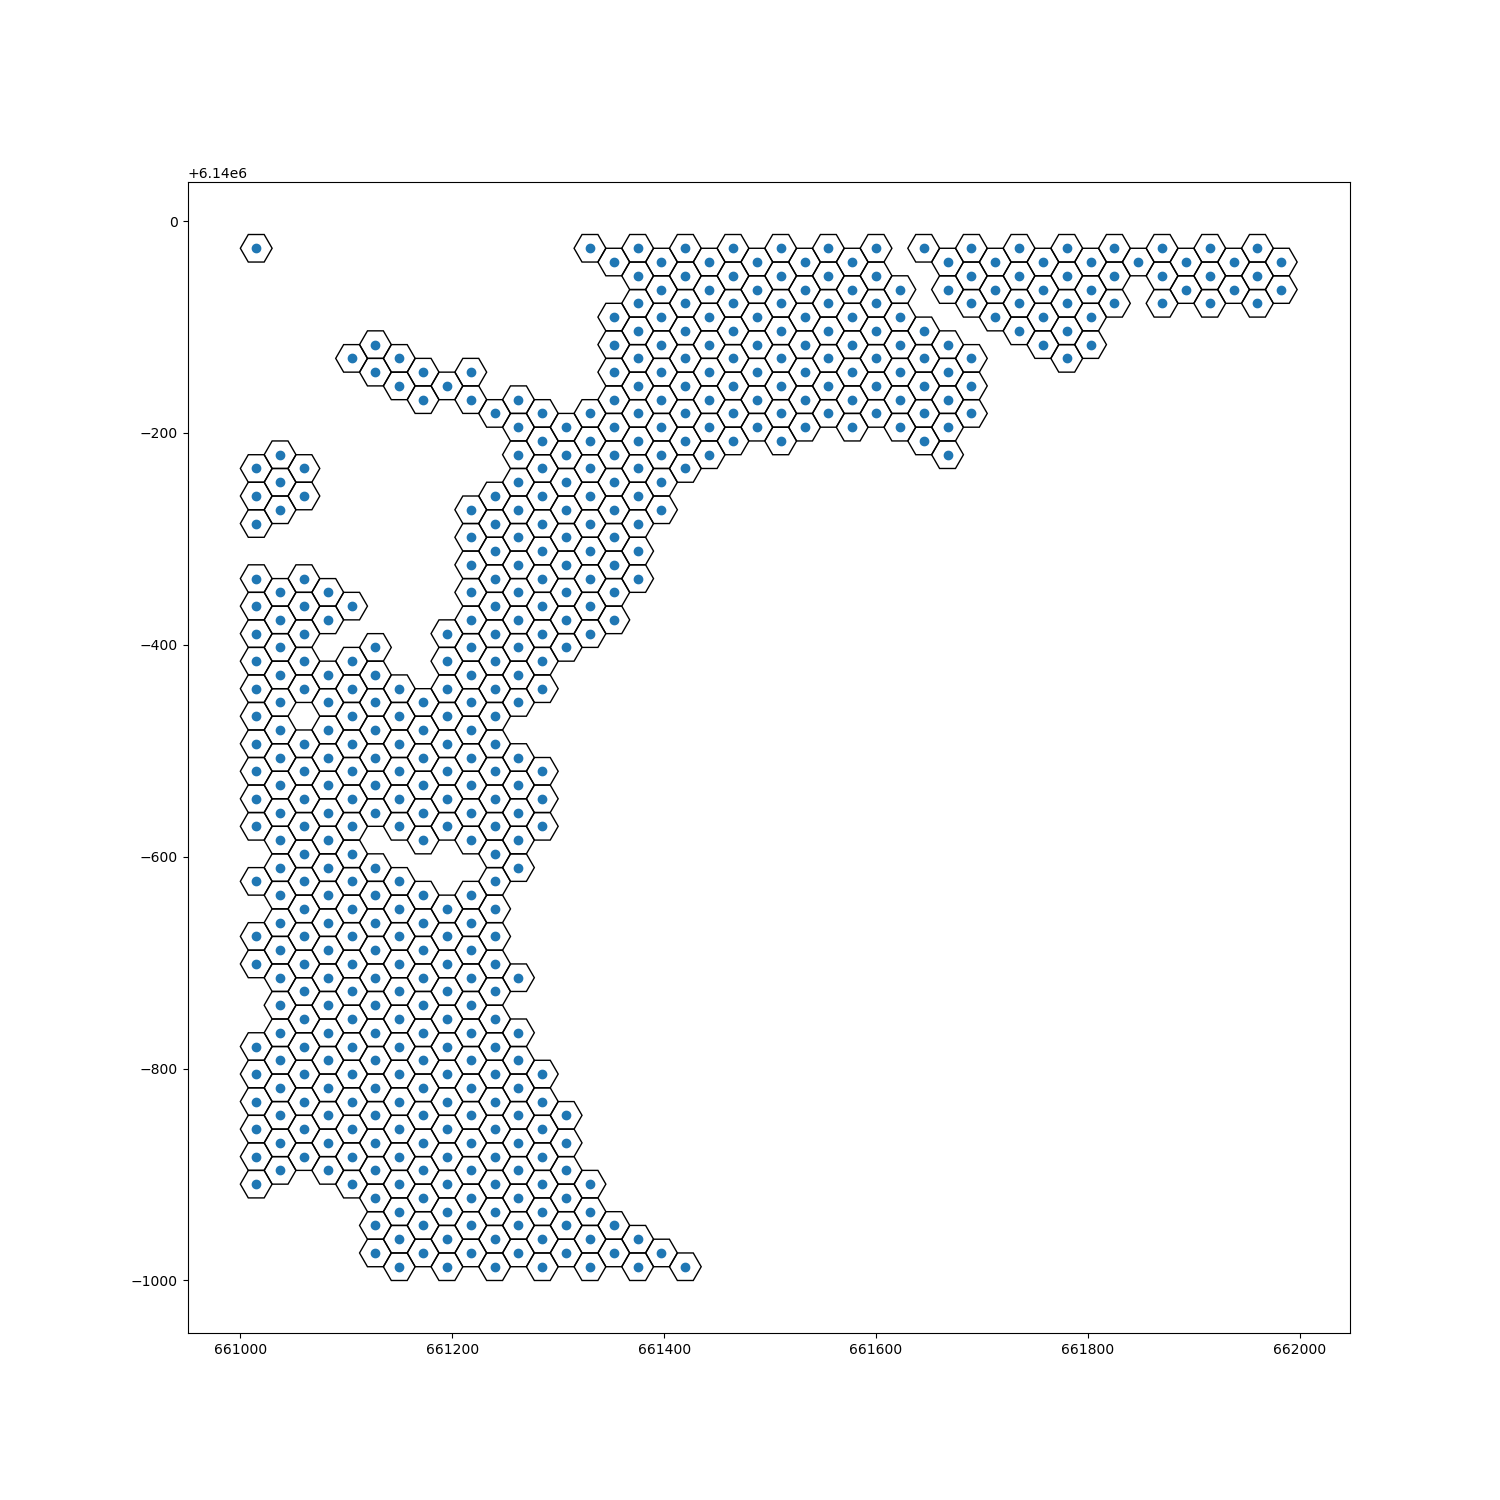

In [20]:
plt.figure(figsize=(15,15))
label_file.plot(ax=plt.gca())
for x, y in np.stack([label_file.geometry.x, label_file.geometry.y], 1):
    hexagon = RegularPolygon((x, y), numVertices=6, radius=15, orientation=np.pi/6, fill=False)
    plt.gca().add_patch(hexagon)

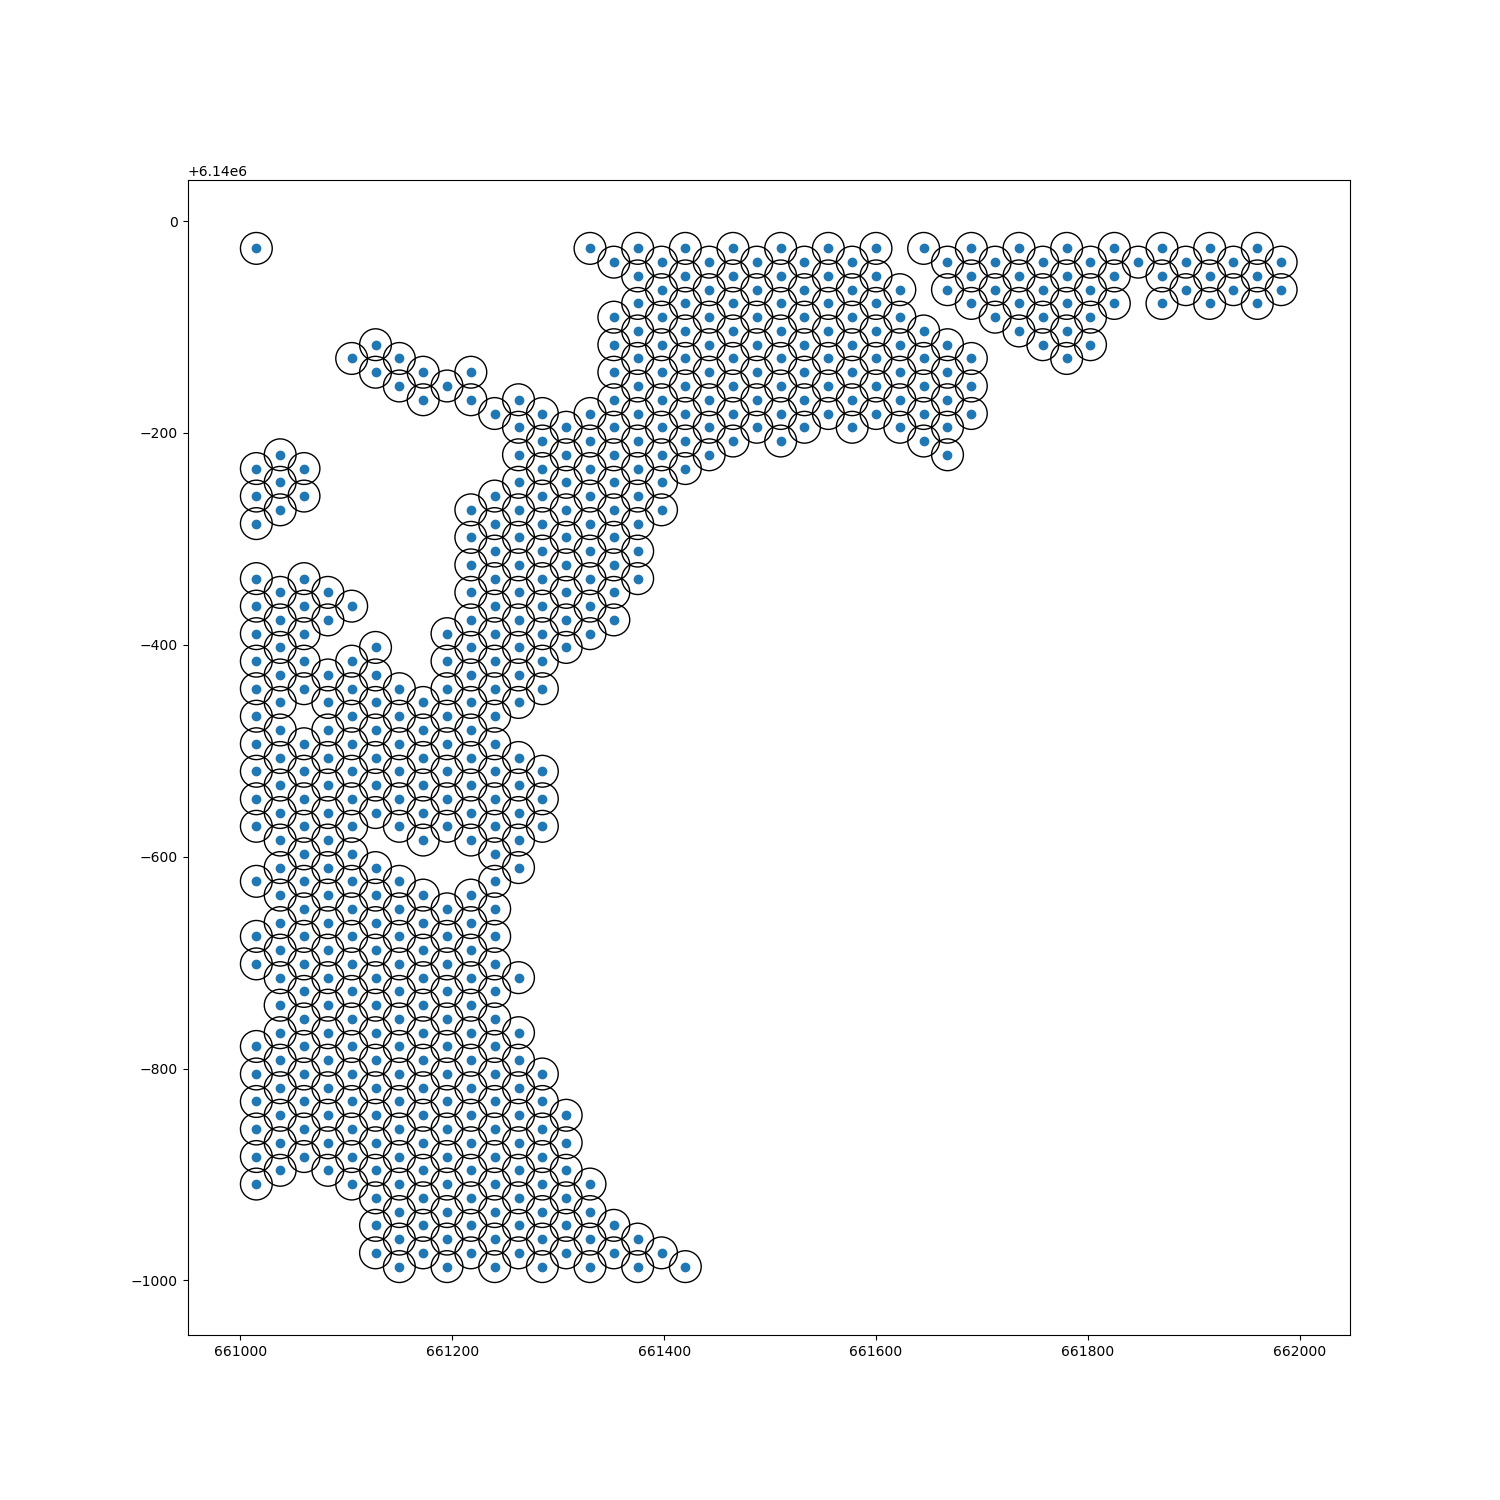

In [19]:
plt.figure(figsize=(15,15))
label_file.plot(ax=plt.gca())
for x, y in np.stack([label_file.geometry.x, label_file.geometry.y], 1):
    circle = Circle((x,y), radius=15, fill=False)
    plt.gca().add_patch(circle)